<font size='10'>**About the data**</font>

*Source*: [**Kaggle**](https://www.kaggle.com/competitions/playground-series-s3e20/data)

Seven main features were extracted weekly from Sentinel-5P from January 2019 to November 2022. Each feature (Sulphur Dioxide, Carbon Monoxide, etc) contain sub features such as column_number_density which is the vertical column density at ground level, calculated using the DOAS technique. You can read more about each feature in the below links, including how they are measured and variable definitions. You are given the values of these features in the test set and your goal to predict CO2 emissions using time information as well as these features.
The dataset includes the following features:
- Sulphur Dioxide - [COPERNICUS/S5P/NRTI/L3_SO2](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_SO2?hl=en)
- Carbon Monoxide - [COPERNICUS/S5P/NRTI/L3_CO](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_CO?hl=en)
- Nitrogen Dioxide - [COPERNICUS/S5P/NRTI/L3_NO2](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_NO2?hl=en)
- Formaldehyde - [COPERNICUS/S5P/NRTI/L3_HCHO](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_HCHO?hl=en)
- UV Aerosol Index - [COPERNICUS/S5P/NRTI/L3_AER_AI](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_AER_AI?hl=en)
- Ozone - [COPERNICUS/S5P/NRTI/L3_O3](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_O3?hl=en)
- Cloud - [COPERNICUS/S5P/OFFL/L3_CLOUD](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_CLOUD?hl=en)

<font size='10'>**Objective**<font>

The objective of this challenge is to create machine learning or a deep learning model using open-source CO2 emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

These solutions will enable governments and other actors to estimate carbon emission levels across Africa, even in places where on-the-ground monitoring is not possible.

**However**, in my case, I just use all knowledge that I have gained to do a project 

<font size='15'>**Import libraries**</font>

In [1]:
# basic
import os
import pandas as pd
import numpy as np
import zipfile
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import KFold,GridSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline

<font size="15">**Extract zip file**</font>


In [2]:
# with zipfile.ZipFile("D:\Machinelearning\Course\Project_Course2\Dataset\CO2Emission.zip") as zipp:
#     zipp.extractall()

<font size="16">**Create folder to store extracted files**</font>

In [3]:
# filename='CO2_data'
# os.makedirs(filename,exist_ok=True)

# #Push files into folder

# filenames=["sample_submission.csv",'test.csv','train.csv']
# for file in filenames:
#     os.rename(file, os.path.join("CO2_data",file))


**Open files**

In [4]:
training_data=pd.read_csv("CO2_data/train.csv")
test_data=pd.read_csv("CO2_data/test.csv")


<font size='15'>**Data Overview**</font>

<font size='5'>**Training data**</font>

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

- There are *76 columns* and *79023 rows*
- There are lots of missing values in the dataset
- Remove some columns: from 57th column to 63rd column 

In [6]:
training_data.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


<font size='5'>**Test data**</font>

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

- There are 75 columns and 24353 rows
- There are a lot of missing values in the dataset
- Remove some columns: from 57th column to 63rd columns

In [8]:
test_data.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
count,24353.000000,24353.000000,24353.0,24353.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,...,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000
mean,-1.891072,29.880155,2022.0,24.000000,0.000014,0.792570,0.000009,0.139218,9.298052,36.174307,...,52291.369823,5850.560884,58914.750636,4876.144989,18.219421,0.256019,-15.910583,40.078944,-82.411205,27.984961
std,0.694532,0.810387,0.0,14.142426,0.000234,0.168043,0.000170,0.079865,67.148199,14.156478,...,8474.312135,1385.456558,9137.478850,1363.987819,12.276853,0.046614,31.296817,6.289530,35.684048,4.446146
min,-3.299000,28.228000,2022.0,0.000000,-0.000977,0.339845,-0.000775,0.000000,-106.809900,0.099606,...,22968.371094,1748.440552,26601.015625,1108.339359,1.758491,0.015563,-106.794670,0.181503,-148.381015,14.451874
25%,-2.451000,29.262000,2022.0,12.000000,-0.000122,0.678384,-0.000094,0.078934,-41.627297,26.577654,...,46443.513511,4891.547765,52564.911002,3919.961568,10.090358,0.229489,-35.621207,35.431041,-119.069505,24.359645
50%,-1.882000,29.883000,2022.0,24.000000,0.000007,0.763307,0.000004,0.138999,16.857963,37.310447,...,52026.814647,5813.010892,58725.298896,4828.621533,14.748459,0.257279,-12.945370,41.097947,-75.828261,28.389770
75%,-1.303000,30.471000,2022.0,36.000000,0.000137,0.872586,0.000104,0.200819,73.664560,45.972595,...,57814.509397,6780.095125,64998.470002,5793.453767,22.200969,0.287632,4.320550,44.186126,-46.573705,31.624962
max,-0.510000,31.532000,2022.0,48.000000,0.004110,1.696826,0.002701,0.299973,157.503026,66.243271,...,83092.004251,11840.539740,88543.121457,10840.539720,123.585268,0.507783,81.252467,65.118706,-22.295398,39.770470


<font size='5'>**Data Cleaning**</font>

In [9]:
dataset=pd.concat([training_data,test_data], ignore_index=True)


In [10]:
dataset

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103371,ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,...,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562,NaN
103372,ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,...,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975,NaN
103373,ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,...,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472,NaN
103374,ID_-3.299_30.301_2022_47,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,...,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455,NaN


<font size='5'>**Remove unnecessary columns**</font>

Columns that be removed:
- From 57th column to 63th column ( a lot of missing data)
- ID_LAT_LON_YEAR_WEEK column

In [11]:
remove_cols=dataset.columns[dataset.isnull().sum()>0.8*len(dataset)].to_list()
remove_cols.append("ID_LAT_LON_YEAR_WEEK")

In [12]:
remove_cols

['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle',
 'ID_LAT_LON_YEAR_WEEK']

In [13]:
dataset.drop(columns=remove_cols,axis=1,inplace=True)

In [14]:
dataset.shape

(103376, 68)

Quick overview of the dataset

In [15]:
def overview(dataset):
    d = {'Shape': dataset.shape,
         'Columns': dataset.columns,
         'Index': dataset.index,
         'Value Types': dataset.dtypes,
         'Duplicated Values': dataset.duplicated().sum(),
         'Number of Unique Values': dataset.nunique(),
         'Any missing Values': dataset.isnull().sum().any(),
        'Missing Values': dataset.isnull().sum(),
        'Describe.T': dataset.describe([0,0.05,0.5,0.75,0.99,1]).T
         }
    Hashtags='-'*50
    for key, val in d.items():
        print(Hashtags,key,Hashtags)
        print(val)
    print(Hashtags,"Endlist",Hashtags)


In [16]:
overview(dataset)

-------------------------------------------------- Shape --------------------------------------------------
(103376, 68)
-------------------------------------------------- Columns --------------------------------------------------
Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide

<font size='15'> Exploratory Data Analysis</font>

**Classify Data**

In [17]:
def classify(dataframe, cat_th=60, car_th=20):
    cat_cols=list(dataframe.columns[dataframe.dtypes=='object']) # categorical columns
    num_but_cat_cols=dataframe.columns[(dataframe.dtypes=='int64') & (dataframe.nunique()<cat_th)]
    # numeric but categorical columns
    cat_but_car_cols=dataframe.columns[(dataframe.dtypes=='object')& (dataframe.nunique()>car_th)]
    # categorical but cardinal columns
    cat_cols+=list(num_but_cat_cols)
    cat_cols = [col for col in cat_cols if col not in cat_but_car_cols]

    num_cols= dataframe.columns[(dataframe.dtypes!='object')]
    num_cols=[col for col in num_cols if col not in num_but_cat_cols]
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car_cols)}')
    print(f'num_but_cat: {len(num_but_cat_cols)}')
    return cat_cols,num_cols, cat_but_car_cols    


In [18]:
cat_cols,num_cols,cat_but_car_cols=classify(dataset)


Observations: 103376
Variables: 68
cat_cols: 2
num_cols: 66
cat_but_car: 0
num_but_cat: 2


**Analysis**
- There are 2 categorical columns
- Almost of the columns are numeric

<font size='5'>Data Visualizations</font>

<Figure size 1000x1000 with 0 Axes>

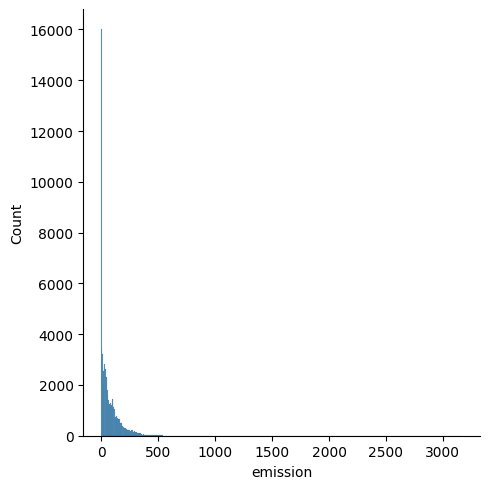

In [19]:
plt.figure(figsize=(10,10))
sns.displot(training_data, x='emission')

<font size='5'>**Categorical Data**</font>

In [20]:
def to_analysis_cat(dataframe, c_cols, ratio=False, plot=False):
    print('-' * 80)
    if dataframe[c_cols].dtype == 'bool':
        dataframe[c_cols] = dataframe[c_cols].astype(int)

    if ratio:
        print(pd.DataFrame({c_cols: dataframe[c_cols].value_counts(),
                            'Ratio (%)': 100 * dataframe[c_cols].value_counts() / len(dataframe)}))
    print('-' * 80)
    if plot:
        values = dataframe[c_cols].value_counts()
        fig, axes = plt.subplots(1, len(values), figsize=(len(values) * 8, 9))

        for i, (index, value) in enumerate(values.items()):
            ax = axes[i]
            ax.pie([value, len(dataframe) - value], labels=[f'{index} ({value})', f'Others ({len(dataframe) - value})'],
                   colors=['#94bcfb', '#bad6fc', '#fffacd'], autopct='%1.1f%%', startangle=90)
            ax.set_title(f'{c_cols} - {index}')
            ax.axis('equal') 

        plt.suptitle(f'RATIO by {c_cols}', y=1.05, fontsize=20)
        plt.tight_layout()
        plt.show()

In [21]:
for col in cat_cols:
    to_analysis_cat(dataset, col, ratio=True, plot=True)

**Analysis with target column**

In [22]:
cat_cols

['year', 'week_no']

In [23]:
def cat_by_target(dataframe, target, c_cols, plot=False):
    
    cat_tar = pd.DataFrame({'Target Mean': dataframe.groupby(c_cols)[target].mean(), 
                            'Count': dataframe[c_cols].value_counts(), 
                            'Ratio (%)': 100 * dataframe[c_cols].value_counts() / len(dataframe)})
    
    print('-' * 80)
    print(c_cols)
    print('-' * 80)
    print(cat_tar, end='\n\n\n')
    
    if plot:
        colors = ['#6c94dc','#b1cffc', '#94bcfb', '#c4dcfc']
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # Hedef Değişken Ortalaması için Bar Plot
        values = dataframe[c_cols].value_counts()
        sns.barplot(x=cat_tar.index, y=cat_tar['Target Mean'],palette=colors[:len(cat_tar)], ax=ax1)
        ax1.set_title(f'Target Mean by {c_cols}')
        ax1.set_ylabel('Target Mean')
        ax1.tick_params(axis='x', rotation=30)
        
        # Kategorik Değişken Dağılımı için Pie Chart
        ax2.pie(x=cat_tar['Count'], labels=cat_tar.index, startangle=90, colors=colors[:len(values)])
        ax2.set_title(f'Ratio by {c_cols}')
        ax2.legend(labels=[f'{index} - {row["Ratio (%)"]:.2f}%'for index, row in cat_tar.iterrows()],
                   loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
        
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.tight_layout()
        plt.show()

In [24]:
for col in cat_cols:
    cat_by_target(dataset,'emission',col,plot=True)

**Consideration**
- ...
- ...

<font size='5'>**Numeric Data**</font>

In [25]:
def to_analysis_num(dataframe, cols, target_col='emission'):

    for col in cols:
        plt.figure(figsize=(10,10))
        plt.subplot(1,2,1)
        sns.histplot(dataframe,x=col,y=target_col)
        
        plt.subplot(1,2,2)
        sns.boxplot(dataframe,x=col)
        plt.tight_layout()
        plt.show()
        plt.close()



In [26]:
to_analysis_num(training_data,num_cols)

**Consideration**
- ...
- ...
- ...

In [27]:
corr= dataset[num_cols].corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)
plt.xticks(fontsize=7, rotation=90)
plt.yticks(fontsize=7, rotation=0)
plt.tight_layout()
plt.show()

In [28]:
corr= dataset.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)
plt.xticks(fontsize=7, rotation=90)
plt.yticks(fontsize=7, rotation=0)
plt.tight_layout()
plt.show()

<font size='5'>**Outlier analysis**</font>

In [29]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [30]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [31]:
for col in num_cols:
    print(col, check_outlier(dataset, col))

latitude False
longitude False
SulphurDioxide_SO2_column_number_density True
SulphurDioxide_SO2_column_number_density_amf False
SulphurDioxide_SO2_slant_column_number_density True
SulphurDioxide_cloud_fraction False
SulphurDioxide_sensor_azimuth_angle False
SulphurDioxide_sensor_zenith_angle False
SulphurDioxide_solar_azimuth_angle False
SulphurDioxide_solar_zenith_angle False
SulphurDioxide_SO2_column_number_density_15km True
CarbonMonoxide_CO_column_number_density False
CarbonMonoxide_H2O_column_number_density True
CarbonMonoxide_cloud_height False
CarbonMonoxide_sensor_altitude False
CarbonMonoxide_sensor_azimuth_angle False
CarbonMonoxide_sensor_zenith_angle False
CarbonMonoxide_solar_azimuth_angle False
CarbonMonoxide_solar_zenith_angle False
NitrogenDioxide_NO2_column_number_density True
NitrogenDioxide_tropospheric_NO2_column_number_density True
NitrogenDioxide_stratospheric_NO2_column_number_density False
NitrogenDioxide_NO2_slant_column_number_density True
NitrogenDioxide_trop

In [32]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [33]:
for col in num_cols:
    if col != 'SalePrice':
        replace_with_thresholds(dataset, col)

In [34]:
for col in num_cols:
    print(col, check_outlier(dataset, col))

latitude False
longitude False
SulphurDioxide_SO2_column_number_density False
SulphurDioxide_SO2_column_number_density_amf False
SulphurDioxide_SO2_slant_column_number_density False
SulphurDioxide_cloud_fraction False
SulphurDioxide_sensor_azimuth_angle False
SulphurDioxide_sensor_zenith_angle False
SulphurDioxide_solar_azimuth_angle False
SulphurDioxide_solar_zenith_angle False
SulphurDioxide_SO2_column_number_density_15km False
CarbonMonoxide_CO_column_number_density False
CarbonMonoxide_H2O_column_number_density False
CarbonMonoxide_cloud_height False
CarbonMonoxide_sensor_altitude False
CarbonMonoxide_sensor_azimuth_angle False
CarbonMonoxide_sensor_zenith_angle False
CarbonMonoxide_solar_azimuth_angle False
CarbonMonoxide_solar_zenith_angle False
NitrogenDioxide_NO2_column_number_density False
NitrogenDioxide_tropospheric_NO2_column_number_density False
NitrogenDioxide_stratospheric_NO2_column_number_density False
NitrogenDioxide_NO2_slant_column_number_density False
NitrogenDioxi

<font size='10'>**Feature Engineering**</font>

**Missing Values Analysis**

In [35]:
dataset.isnull().sum()

latitude                                        0
longitude                                       0
year                                            0
week_no                                         0
SulphurDioxide_SO2_column_number_density    20751
                                            ...  
Cloud_sensor_azimuth_angle                    650
Cloud_sensor_zenith_angle                     650
Cloud_solar_azimuth_angle                     650
Cloud_solar_zenith_angle                      650
emission                                    24353
Length: 68, dtype: int64

In [36]:
dataset=dataset.fillna(0)

In [37]:
dataset

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,-0.510,29.290,2019,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103371,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,61.114494,...,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562,0.000000
103372,-3.299,30.301,2022,45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975,0.000000
103373,-3.299,30.301,2022,46,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472,0.000000
103374,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,38.215228,...,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455,0.000000


**Remove highly correlated columns**

In [38]:
def find_highly_correlated_cols(dataframe,corr_th=0.9):
    corr= dataframe[num_cols].corr()
    corr_matrix=corr.abs()
    upper_triangle_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

    highly_correlated_cols=set()
    for col in upper_triangle_matrix.columns:
        if any(upper_triangle_matrix[col]>corr_th):
            highly_correlated_cols.add(col)
    return highly_correlated_cols

In [39]:
dataset.shape

(103376, 68)

In [40]:
dataset.drop(columns=find_highly_correlated_cols(dataset),axis=1,inplace=True)


In [41]:
dataset.shape

(103376, 48)

**One-hot Encoding vs Scaling**

In [42]:
cat_cols,num_cols,cat_but_car_cols=classify(dataset)

Observations: 103376
Variables: 48
cat_cols: 2
num_cols: 46
cat_but_car: 0
num_but_cat: 2


In [43]:
scaler=StandardScaler()
num_cols = [col for col in num_cols if col not in ['emission']]
dataset[num_cols]=scaler.fit_transform(dataset[num_cols])
dataset=pd.get_dummies(dataset,columns=cat_cols,drop_first=True,dtype=int)
    

<font size="10">**Modeling**</font>

In [44]:
df=dataset.iloc[:79023]
test_set=dataset.iloc[79023:]

# df_train = df[df['SalePrice'].notnull()]
# df_test = df[df['SalePrice'].isnull()]

In [45]:
y=df["emission"]
X=df.drop(columns="emission")

In [46]:
df

,latitude,longitude,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,CarbonMonoxide_CO_column_number_density,...,week_no_43,week_no_44,week_no_45,week_no_46,week_no_47,week_no_48,week_no_49,week_no_50,week_no_51,week_no_52
0,1.988534,-0.728253,-0.614002,-0.154033,1.465903,-1.631634,1.082123,-1.352319,1.164929,0.398447,...,0,0,0,0,0,0,0,0,0,0
1,1.988534,-0.728253,-0.046659,0.185482,0.085816,0.340622,0.483016,-1.581248,0.591251,0.534397,...,0,0,0,0,0,0,0,0,0,0
2,1.988534,-0.728253,2.126510,0.239679,-0.146304,1.302943,1.185772,-1.778317,0.113110,0.394681,...,0,0,0,0,0,0,0,0,0,0
3,1.988534,-0.728253,-0.137030,-1.789364,-1.364101,0.056515,-1.519942,1.398362,-1.813697,0.565494,...,0,0,0,0,0,0,0,0,0,0
4,1.988534,-0.728253,-0.483803,0.044686,-0.022929,0.127080,0.297670,-1.507955,0.206564,0.316762,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-2.027202,0.519324,1.113191,1.453105,0.753552,1.303366,1.345406,-1.580124,0.274365,-0.645957,...,0,0,0,0,0,1,0,0,0,0
79019,-2.027202,0.519324,0.228909,1.277443,0.597582,-0.163622,-0.525283,-1.374815,0.776614,-0.697515,...,0,0,0,0,0,0,1,0,0,0
79020,-2.027202,0.519324,-0.137030,-1.789364,-1.364101,0.056515,-1.519942,1.398362,-1.813697,-0.221392,...,0,0,0,0,0,0,0,1,0,0
79021,-2.027202,0.519324,-0.286385,0.595477,0.674921,-1.661614,0.148425,-1.342222,1.001489,-0.113984,...,0,0,0,0,0,0,0,0,1,0


In [47]:
test_set

,latitude,longitude,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,CarbonMonoxide_CO_column_number_density,...,week_no_43,week_no_44,week_no_45,week_no_46,week_no_47,week_no_48,week_no_49,week_no_50,week_no_51,week_no_52
79023,1.988534,-0.728253,-0.137030,-1.789364,-1.364101,0.056515,-1.519942,1.398362,-1.813697,-3.760652,...,0,0,0,0,0,0,0,0,0,0
79024,1.988534,-0.728253,1.870205,0.085008,-1.364101,1.361901,-0.721536,-1.573960,0.585521,0.665574,...,0,0,0,0,0,0,0,0,0,0
79025,1.988534,-0.728253,0.569825,-0.148372,-0.480020,-0.663567,0.521495,-1.497375,0.681715,0.683680,...,0,0,0,0,0,0,0,0,0,0
79026,1.988534,-0.728253,1.403787,0.100608,0.861089,1.292220,1.492518,-1.837702,-0.003113,0.912770,...,0,0,0,0,0,0,0,0,0,0
79027,1.988534,-0.728253,-1.532449,-0.215030,0.897884,1.361074,-0.719212,-1.473809,0.206259,0.852635,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103371,-2.027202,0.519324,-2.857609,0.232495,1.231503,1.294559,1.607768,-1.223609,-0.164236,0.303908,...,0,1,0,0,0,0,0,0,0,0
103372,-2.027202,0.519324,-0.137030,-1.789364,-1.364101,0.056515,-1.519942,1.398362,-1.813697,0.759317,...,0,0,1,0,0,0,0,0,0,0
103373,-2.027202,0.519324,-0.137030,-1.789364,-1.364101,0.056515,-1.519942,1.398362,-1.813697,0.124727,...,0,0,0,1,0,0,0,0,0,0
103374,-2.027202,0.519324,0.174839,0.932860,0.905910,1.329167,0.435832,-1.389508,0.406981,-0.155089,...,0,0,0,0,1,0,0,0,0,0


In [48]:
LR_model=LinearRegression()
poly_feature=PolynomialFeatures(degree=3)
lasso=Lasso()
catboost=CatBoostRegressor()
kf=KFold(shuffle=True,n_splits=4,random_state=42)

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [50]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [51]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=1000)
    
    predictions = cross_val_predict(las, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.451e+08, tolerance: 5.341e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.395e+08, tolerance: 5.222e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

In [52]:
list(zip(alphas,scores))

[(1e-09, 0.07982937668781331),
 (1e-08, 0.07982937675583324),
 (1e-07, 0.07982937743595775),
 (1e-06, 0.0798293842294705),
 (1e-05, 0.07982945138266251),
 (0.0001, 0.07983004496660429),
 (0.001, 0.079826614219487),
 (0.01, 0.07957211286445798),
 (0.1, 0.07740571243787986),
 (1.0, 0.058233333723346714)]

In [53]:
Lasso(alpha=1e-6).fit(X, y).coef_

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.182e+08, tolerance: 7.036e+04
  model = cd_fast.enet_coordinate_descent(


array([ 1.49123623e+00,  1.93087777e+01, -1.74620953e-01, -1.78988551e+01,
        9.06804293e-02,  3.23128188e+00,  2.98246502e-01, -4.03843067e+00,
        1.55941120e+01, -6.70499700e+00, -1.15593858e+01, -1.98482352e+00,
        1.80225733e+01, -2.98996663e+00,  3.36089356e-03, -1.50975125e+00,
       -7.53465865e+00, -1.02764393e+01,  6.10412834e+00, -2.53530606e+00,
        4.11983973e+00, -8.78655147e-01, -1.09440275e+00, -1.57032939e-01,
       -1.19438028e+00,  1.11777979e+01, -2.84561307e-01, -6.92799874e+00,
        1.83983369e+00, -1.35523906e+00, -3.08182575e+00, -2.23554567e+00,
        3.63402263e+00,  1.22639124e+00, -7.63828713e-01,  1.20952733e+01,
        4.19599179e+00,  4.57361770e-01, -1.87725423e+00, -9.00896485e+00,
       -8.73212586e+00,  3.30152089e-01,  9.35538171e+00,  1.01409111e+00,
       -1.37133709e+00, -9.88833600e+00, -1.09215660e+00,  0.00000000e+00,
        9.46938380e+00,  1.49625021e+01,  2.21974788e+01,  1.68523897e+01,
        1.74276388e+01,  

In [54]:
Lasso(alpha=1.0).fit(X, y).coef_

array([ 0.        , 17.63772787, -0.        , -0.        ,  0.        ,
       -0.24718747, -0.        , -0.23031287,  0.        , -2.71717071,
       -8.65977598, -0.        ,  6.15547975, -0.        , -0.        ,
       -1.64718072, -0.        ,  0.        ,  0.        , -0.        ,
        0.73370277, -0.30146253, -0.        , -0.        , -1.20911633,
        2.49056017, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -4.26576101, -0.        ,  0.        , -0.12206367,
        0.        ,  0.        ,  6.50873928,  0.        , -1.03662932,
       -3.70331785, -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

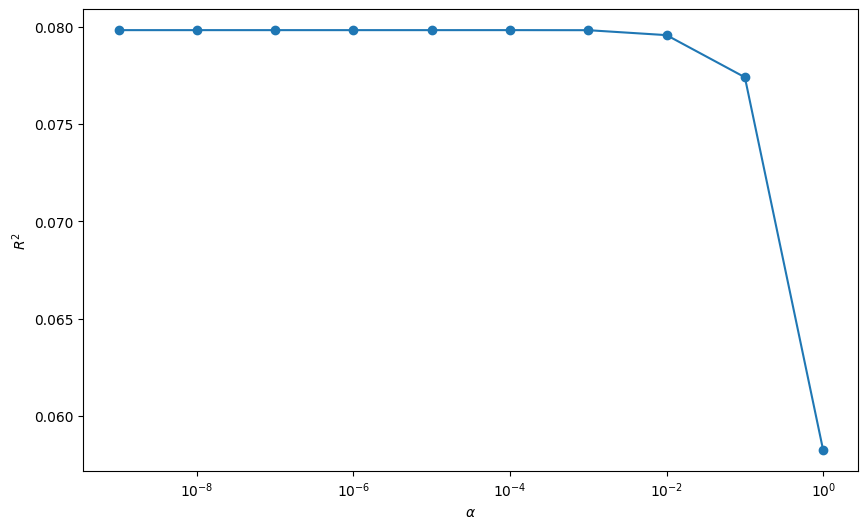

In [55]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

**Polynomial Regression**

In [57]:
pf = PolynomialFeatures(degree=3)

scores = []
las = Lasso(alpha=0.06, max_iter=100)
    
estimator = Pipeline([
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

predictions = cross_val_predict(estimator, X, y, cv = kf)
    
score = r2_score(y, predictions)
    
scores.append(score)
    

MemoryError: Unable to allocate 78.1 GiB for an array with shape (59267, 176851) and data type float64

In [ ]:
plt.semilogx(alphas, scores);

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

In [ ]:
best_estimator.named_steps["lasso_regression"].coef_

**Ridge Regression**

In [58]:
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [59]:
grid.fit(X, y)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\AppData\L

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.3535936 ,  4.73844431,  5.15731521,  5.61321363,
        6.10941274,  6.64947505,  7.23727802,  7.87704182,  8.57335972,
        9.331231  , 10.1560969 , 11.05387963, 12.03102491, 13.09454827,
       14.25208539, 15.51194695, 16.88317825, 18.37562421, 20.        ])})

In [60]:
grid.best_score_, grid.best_params_

(0.20311302712267956,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 20.0})

In [61]:
y_predict = grid.predict(X)

In [62]:
r2_score(y, y_predict)

0.2687774096232185

In [63]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.        ,  7.97347506, 22.3819227 , ...,  0.55176322,
        0.        ,  6.05595932])

In [64]:
grid.cv_results_

{'mean_fit_time': array([ 0.43979496,  0.42122459,  0.47210181,  0.41824883,  0.42661184,
         0.47708613,  0.3747052 ,  0.31336796,  0.42098182,  0.46144295,
         0.41848147,  0.39335531,  0.44800222,  0.41652119,  0.500664  ,
         0.47011054,  0.50418675,  0.40416402,  0.38793087,  0.46197432,
        32.19108528, 32.27565289, 30.53048754, 30.77578682, 36.13688868,
        36.96597236, 41.54909253, 42.34361833, 42.55489618, 37.62964088,
        39.32894307, 36.40419614, 36.01147026, 32.08691078, 32.33090287,
        32.25140178, 34.24137157, 36.15168196, 40.7615127 , 33.23797977,
         0.1249249 ,  0.1317507 ,  0.09666097,  0.08982646,  0.08024913,
         0.08285987,  0.08675677,  0.08251297,  0.08663642,  0.1060105 ,
         0.11499929,  0.113262  ,  0.11521274,  0.11573231,  0.08287549,
         0.08050936,  0.10250694,  0.08600837,  0.08246565,  0.11731946]),
 'std_fit_time': array([5.60769402e-02, 7.82329347e-02, 1.05150910e-01, 8.80384029e-02,
        4.0298744

**Catboost Regressor**

**Hyperparameter Tuning**

In [65]:
cb_params={'iterations':[300,500],
           'learning_rate':[0.01,0.05],
           'depth':[10,20]}
cb_best = GridSearchCV(catboost,
                             cb_params,
                             cv=3,
                             n_jobs=-1,
                             verbose=True).fit(X, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\catboost\core.py", line 5827, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
    

0:	learn: 93.9865666	total: 329ms	remaining: 1m 38s
1:	learn: 93.6895781	total: 519ms	remaining: 1m 17s
2:	learn: 93.3711861	total: 730ms	remaining: 1m 12s
3:	learn: 93.0710158	total: 930ms	remaining: 1m 8s
4:	learn: 92.7830940	total: 1.15s	remaining: 1m 7s
5:	learn: 92.4844000	total: 1.36s	remaining: 1m 6s
6:	learn: 92.1764378	total: 1.59s	remaining: 1m 6s
7:	learn: 91.9165153	total: 1.84s	remaining: 1m 7s
8:	learn: 91.5669260	total: 2.05s	remaining: 1m 6s
9:	learn: 91.3031621	total: 2.26s	remaining: 1m 5s
10:	learn: 91.0448293	total: 2.47s	remaining: 1m 4s
11:	learn: 90.7497807	total: 2.68s	remaining: 1m 4s
12:	learn: 90.4422433	total: 2.88s	remaining: 1m 3s
13:	learn: 90.1736033	total: 3.08s	remaining: 1m 2s
14:	learn: 89.9230637	total: 3.26s	remaining: 1m 1s
15:	learn: 89.6640899	total: 3.45s	remaining: 1m 1s
16:	learn: 89.4017575	total: 3.63s	remaining: 1m
17:	learn: 89.1411580	total: 3.85s	remaining: 1m
18:	learn: 88.8552829	total: 4.04s	remaining: 59.7s
19:	learn: 88.5912529	tot

In [66]:
cb_best.best_params_

{'depth': 10, 'iterations': 300, 'learning_rate': 0.01}

In [67]:
final_model = catboost.set_params(**cb_best.best_params_).fit(X, y)

0:	learn: 93.9865666	total: 205ms	remaining: 1m 1s
1:	learn: 93.6895781	total: 413ms	remaining: 1m 1s
2:	learn: 93.3711861	total: 623ms	remaining: 1m 1s
3:	learn: 93.0710158	total: 832ms	remaining: 1m 1s
4:	learn: 92.7830940	total: 1.03s	remaining: 1m
5:	learn: 92.4844000	total: 1.22s	remaining: 59.9s
6:	learn: 92.1764378	total: 1.42s	remaining: 59.2s
7:	learn: 91.9165153	total: 1.6s	remaining: 58.6s
8:	learn: 91.5669260	total: 1.8s	remaining: 58.1s
9:	learn: 91.3031621	total: 1.98s	remaining: 57.5s
10:	learn: 91.0448293	total: 2.17s	remaining: 57.1s
11:	learn: 90.7497807	total: 2.36s	remaining: 56.7s
12:	learn: 90.4422433	total: 2.54s	remaining: 56.2s
13:	learn: 90.1736033	total: 2.73s	remaining: 55.8s
14:	learn: 89.9230637	total: 2.92s	remaining: 55.5s
15:	learn: 89.6640899	total: 3.13s	remaining: 55.6s
16:	learn: 89.4017575	total: 3.34s	remaining: 55.6s
17:	learn: 89.1411580	total: 3.54s	remaining: 55.5s
18:	learn: 88.8552829	total: 3.75s	remaining: 55.4s
19:	learn: 88.5912529	total

In [68]:
test_set.drop("emission",axis=1,inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11592\2952312998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop("emission",axis=1,inplace=True)


In [69]:
predictions = final_model.predict(test_set)

In [70]:
dictionary = {'ID_LAT_LON_YEAR_WEEK':test_data['ID_LAT_LON_YEAR_WEEK'], 'emission':predictions}
dfSubmission = pd.DataFrame(dictionary)

dfSubmission.head(20)

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,13.500661
1,ID_-0.510_29.290_2022_01,14.526790
2,ID_-0.510_29.290_2022_02,14.427580
3,ID_-0.510_29.290_2022_03,14.270816
4,ID_-0.510_29.290_2022_04,14.487330
5,ID_-0.510_29.290_2022_05,13.877186
6,ID_-0.510_29.290_2022_06,14.531220
7,ID_-0.510_29.290_2022_07,13.413176
8,ID_-0.510_29.290_2022_08,13.965980
9,ID_-0.510_29.290_2022_09,14.725499


In [ ]:
check=pd.read_csv("CO2_data/BaselineSubmission.csv")

print("score:",mean_squared_error(check['emission'],predictions,squared=False))


score: 128.58676564087062


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<font size='10'>Suggestion</font>

- Need to add new features through **feature extraction** to help the model learn well
- Need more data visualization and analysize the data more effectively
- Reduce size of iteration to reduce time